In [3]:
import tensorflow as tf
import numpy as np

In [191]:
Input=np.array([[1,0], [0,1], [0,0], [1,1]])
w1=0.45
w2=0.78
w3=-12
w4=1.3
w5=1.5
w6=-2.3
w11=1
w12=1
w21=1
target=Input[:,0]^Input[:,1]
print(target)


[1 1 0 0]


In [192]:
H1in=Input[:,0]*w1+Input[:,1]*w3+w11
H2in=Input[:,0]*w2+Input[:,1]*w4+w11

In [193]:
H2out=tf.nn.sigmoid(H2in).numpy()
H1out=tf.nn.sigmoid(H1in).numpy()

In [194]:
O1in=H2out*w6+H1out*w5+w21
O1out=tf.nn.sigmoid(O1in).numpy()

In [151]:
Error=0
for i in range(4):
    Error=Error+((target[i]-O1out[i])**2)
Error/=4
print(Error)

0.26489880975898755


In [203]:
for j in range(500000):
    for i in range(4):
        err=target[i]-O1out[i]
        delta_out = err * O1out[i] * (1 - O1out[i])
        h1Err=delta_out*w5*H1out[i]*(1-H1out[i])
        h2Err=delta_out*w6*H2out[i]*(1-H2out[i])
        w5+=0.1*delta_out*H1out[i]
        w6+=0.1*delta_out*H2out[i]
        w21+=0.1*delta_out
        w1+=0.1*h1Err*Input[i,0]
        w2+=0.1*h2Err*Input[i,0]  
        w3+=0.1*h1Err*Input[i,1]
        w4+=0.1*h2Err*Input[i,1]
        w11+=0.1*h1Err
        w12+=0.1*h2Err
        H1in[i]=Input[i,0]*w1+Input[i,1]*w3+w11
        H2in[i]=Input[i,0]*w2+Input[i,1]*w4+w12
        H2out[i]=tf.nn.sigmoid(H2in[i]).numpy()
        H1out[i]=tf.nn.sigmoid(H1in[i]).numpy()      
        O1in[i]=H2out[i]*w6+H1out[i]*w5+w21
        O1out[i]=tf.nn.sigmoid(O1in[i]).numpy()
newError=0
for j in range(4):
    newError=newError+((target[j]-O1out[j])**2)
newError/=4
print(newError)
print(O1out, w1,w2,w3,w4,w5,w6,w11,w12,w21)
    

2.3063350734282904e-05
[0.99551223 0.99445709 0.0050915  0.00393269] 7.275944927675544 6.5536638016181605 -12.008488203836578 -6.703855586179291 11.639540227603742 -11.568664677760939 -3.568202100418174 3.4238684454629023 5.6091973224438565


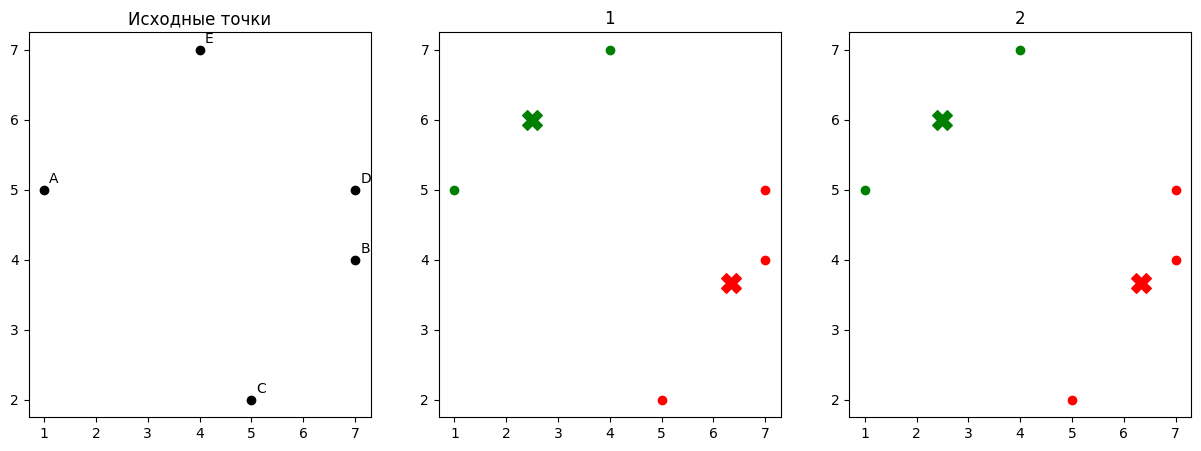

In [11]:
import matplotlib.pyplot as plt

points = {
    "A": (1, 5),
    "B": (7, 4),
    "C": (5, 2),
    "D": (7, 5),
    "E": (4, 7),
}

C1_0 = (1, 5)
C2_0 = (7, 4)

#C: C1:sqrt((5-1)**2+(2-5)**2)=5
#C: C2:sqrt((5-7)**2+(2-4)**2)=2.83 !
#D: C1:sqrt((7-1)**2+(5-5)**2)=6
#D: C2:sqrt((7-7)**2+(5-4)**2)=1 !
#E: C1:sqrt((4-1)**2+(7-5)**2)=sqrt13 !
#E: C2:sqrt((4-7)**2+(7-4)**2)=3sqrt2

cluster1_iter1 = [(1, 5), (4, 7)]
cluster2_iter1 = [(7, 4), (5, 2), (7, 5)]
#C1=A
#C2=B
C1_1 = ((1+4)/2, (5+7)/2)
C2_1 = ((7+5+7)/3, (4+2+5)/3)

#A: C1:sqrt((2.5-1)**2+(6-5)**2)=1.8 !
#A: C2:sqrt((2.5-7)**2+(6-4)**2)=5.52
#B: C1:sqrt((7-2.5)**2+(6-4)**2)=4.72
#B: C2:sqrt((7-6.33)**2+(3.67-4)**2)=0.75 !
#C: C1:sqrt((5-2.5)**2+(2-6)**2)=4.72
#C: C2:sqrt((5-6.33)**2+(2-3.67)**2)=2.08 !
#D: C1:sqrt((7-2.5)**2+(5-6)**2)=4.61
#D: C2:sqrt((6.33-7)**2+(5-3.67)**2)=1.37 !
#E: C1:sqrt((4-2.5)**2+(7-6)**2)=1.8 !
#E: C2:sqrt((4-6.33)**2+(7-3.67)**2)=4.06

cluster1_iter2 = cluster1_iter1
cluster2_iter2 = cluster2_iter1

C1_2 = C1_1
C2_2 = C2_1

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(*zip(*points.values()), color="black")
for name, (x, y) in points.items():
    axes[0].text(x+0.1, y+0.1, name)
axes[0].set_title("Исходные точки")

axes[1].scatter(*zip(*cluster1_iter1), color="green")
axes[1].scatter(*zip(*cluster2_iter1), color="red")
axes[1].scatter(*C1_1, color="green", marker="X", s=200)
axes[1].scatter(*C2_1, color="red", marker="X", s=200)
axes[1].set_title("1")

axes[2].scatter(*zip(*cluster1_iter2), color="green")
axes[2].scatter(*zip(*cluster2_iter2), color="red")
axes[2].scatter(*C1_2, color="green", marker="X", s=200)
axes[2].scatter(*C2_2, color="red", marker="X", s=200)
axes[2].set_title(2)

plt.show()
